# 图像特征练习
*完成并连同作业上交你完整的工作表(包括其输出及工作表外的任何支持代码)，更多详情请参见课程网站上的[作业页面](http://vision.stanford.edu/teaching/cs231n/assignments.html)。*
我们已经看到，通过训练一个基于输入图像像素的线性分类器，我们可以在一个图像分类任务上获得合理的性能。在这个练习中，我们将展示我们可以通过训练线性分类器来提高我们的分类性能，不是在原始像素上，而是在从原始像素计算出来的特征上。
你这次练习的所有工作都将在这个笔记本上完成。

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 加载数据
与前面的练习类似，我们将从磁盘加载CIFAR-10数据。

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## 提取特征
我们将计算每个图像的方向直方图梯度(HOG)以及在HSV中使用色调通道的颜色直方图颜色空间。我们通过连接形成每个图像的最终特征向量HOG和颜色直方图特征向量。

粗略地说，HOG应该捕捉图像的纹理，而忽略它颜色信息，颜色直方图表示输入的颜色图像而忽略纹理。因此，我们希望两者一起使用应该比单独使用这两种方法效果更好.

 `hog_feature `和` color_histogram_hsv` 函数都在单一的对象上操作并返回该图像的特征向量。`extract_features`函数获取一组图像和一组特征函数并求值每个图像上的每个特征函数，将结果存储在一个矩阵中,每一列都是一张图像所有特征向量的串联。

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## 训练SVM的特性
使用之前开发的多类SVM代码，在上述特征的基础上训练SVM;这应该比直接在原始像素上训练支持向量机得到更好的结果。

rate: 1.000000e-09 ,reg: 1.000000e+04 ,figure :1 
rate: 1.000000e-09 ,reg: 5.000000e+04 ,figure :2 
rate: 1.000000e-09 ,reg: 1.000000e+05 ,figure :3 
rate: 1.000000e-09 ,reg: 5.000000e+05 ,figure :4 
rate: 1.000000e-09 ,reg: 1.000000e+06 ,figure :5 
rate: 1.000000e-09 ,reg: 5.000000e+06 ,figure :6 
rate: 1.000000e-09 ,reg: 1.000000e+07 ,figure :7 
rate: 1.000000e-08 ,reg: 1.000000e+04 ,figure :8 
rate: 1.000000e-08 ,reg: 5.000000e+04 ,figure :9 
rate: 1.000000e-08 ,reg: 1.000000e+05 ,figure :10 
rate: 1.000000e-08 ,reg: 5.000000e+05 ,figure :11 
rate: 1.000000e-08 ,reg: 1.000000e+06 ,figure :12 
rate: 1.000000e-08 ,reg: 5.000000e+06 ,figure :13 
rate: 1.000000e-08 ,reg: 1.000000e+07 ,figure :14 
rate: 1.000000e-07 ,reg: 1.000000e+04 ,figure :15 
rate: 1.000000e-07 ,reg: 5.000000e+04 ,figure :16 
rate: 1.000000e-07 ,reg: 1.000000e+05 ,figure :17 
rate: 1.000000e-07 ,reg: 5.000000e+05 ,figure :18 
rate: 1.000000e-07 ,reg: 1.000000e+06 ,figure :19 
rate: 1.000000e-07 ,reg: 5.000000e+06 ,f

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


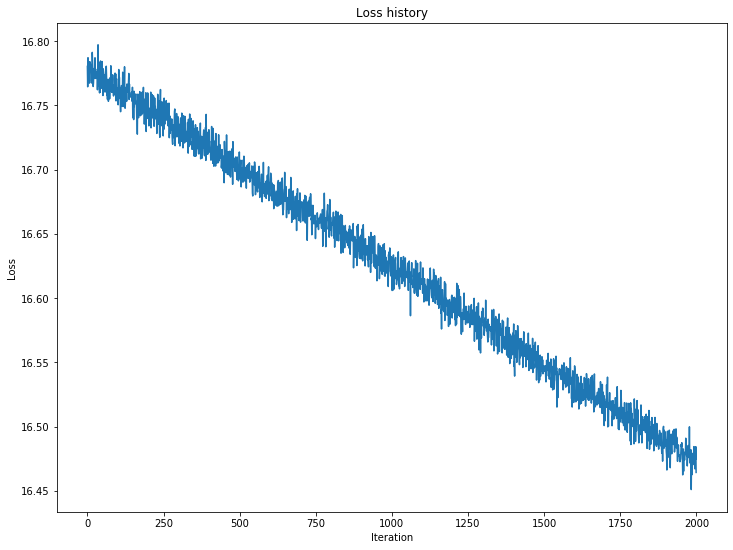

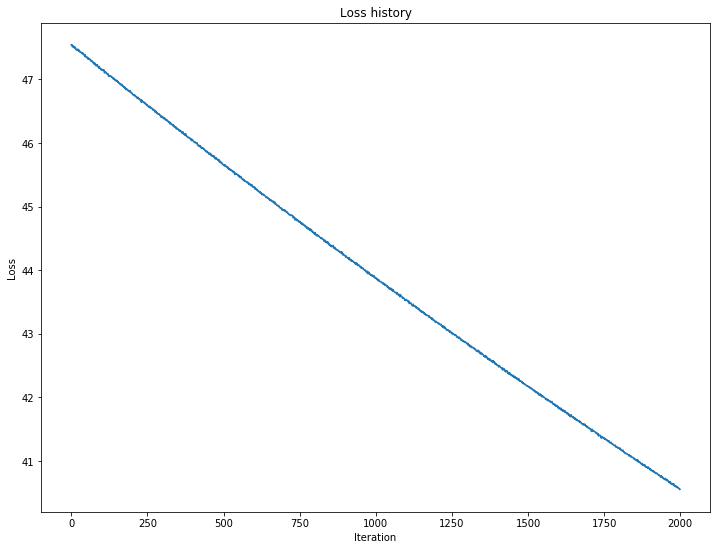

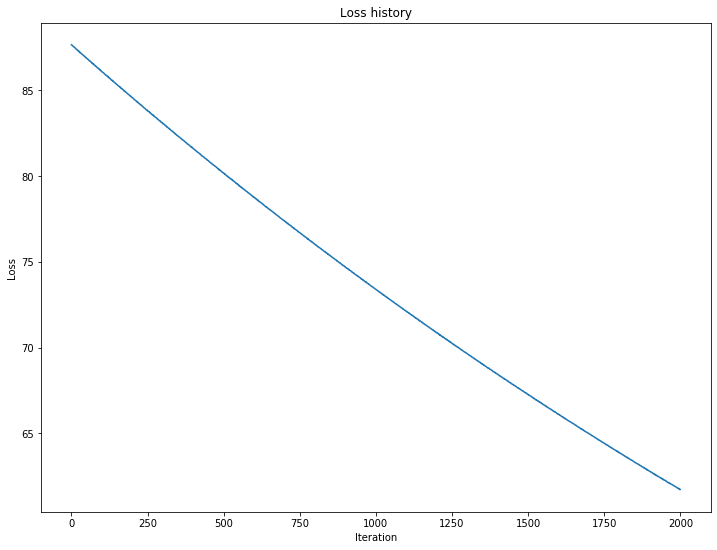

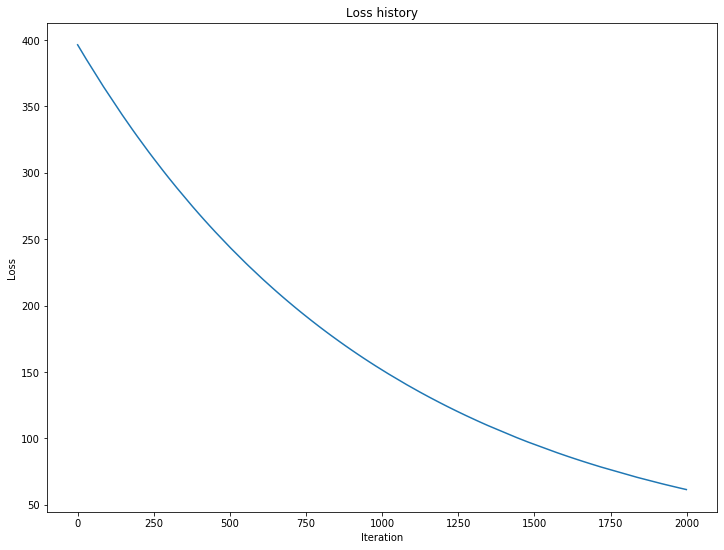

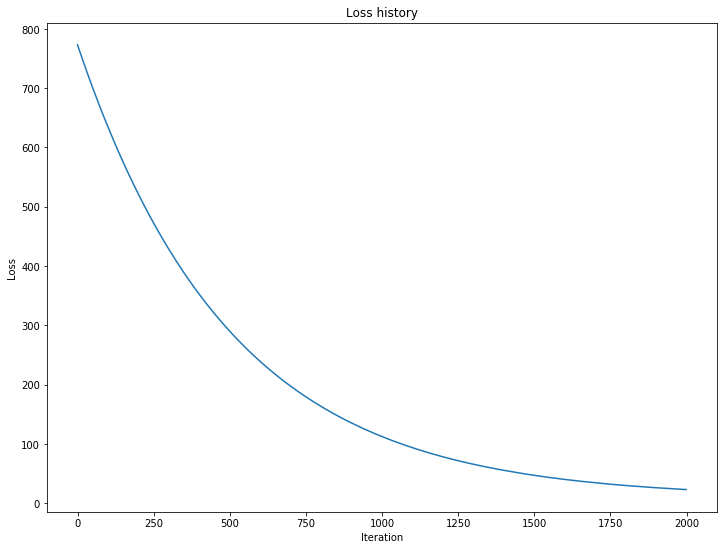

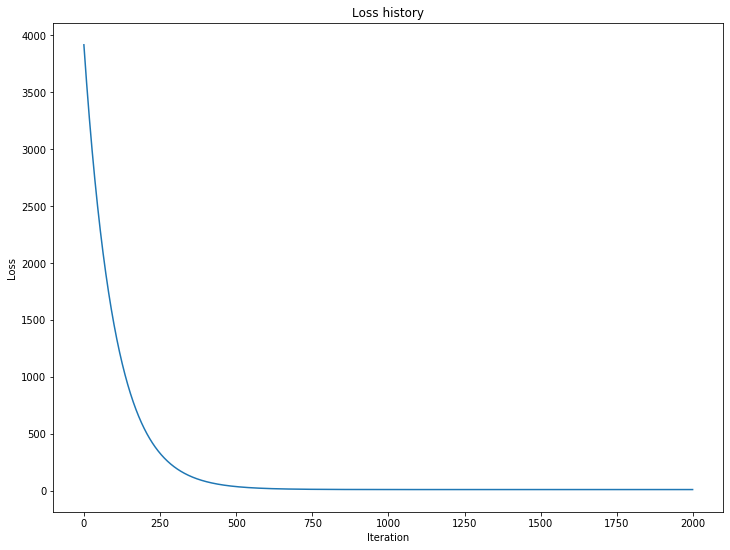

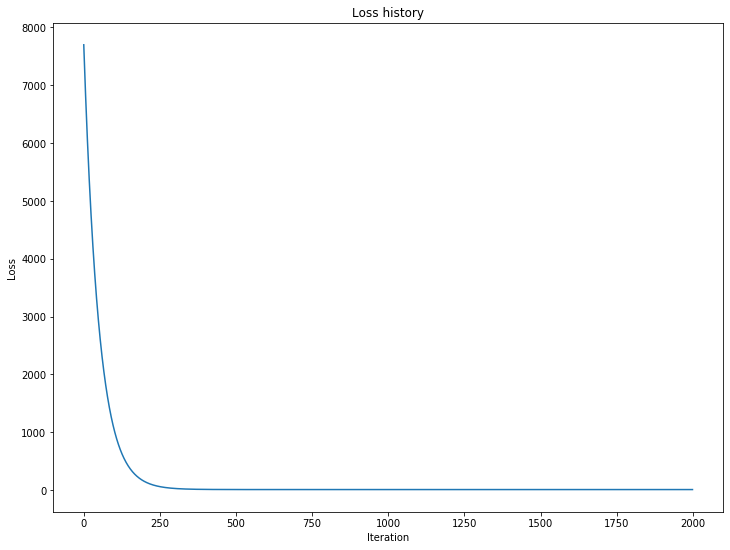

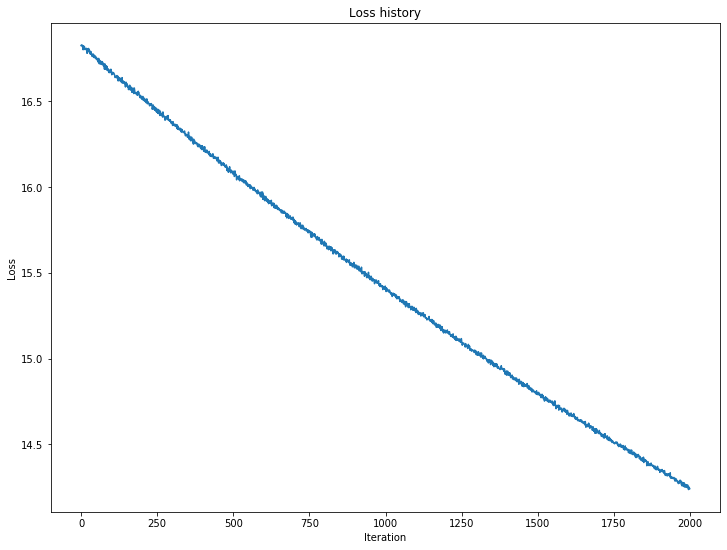

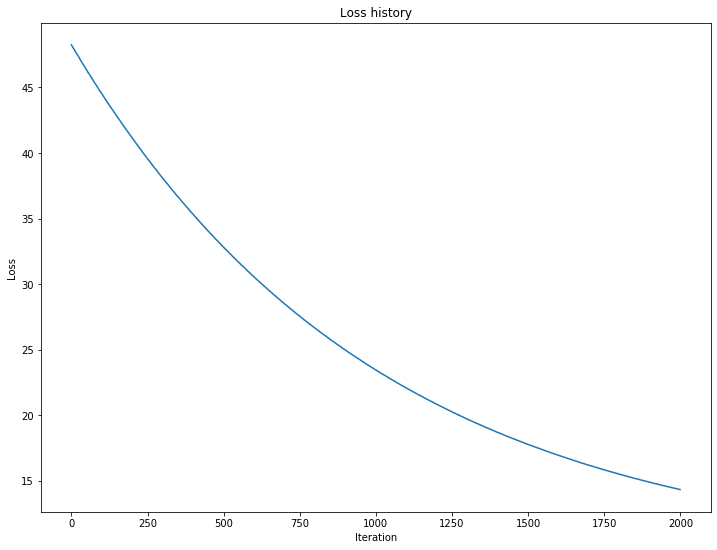

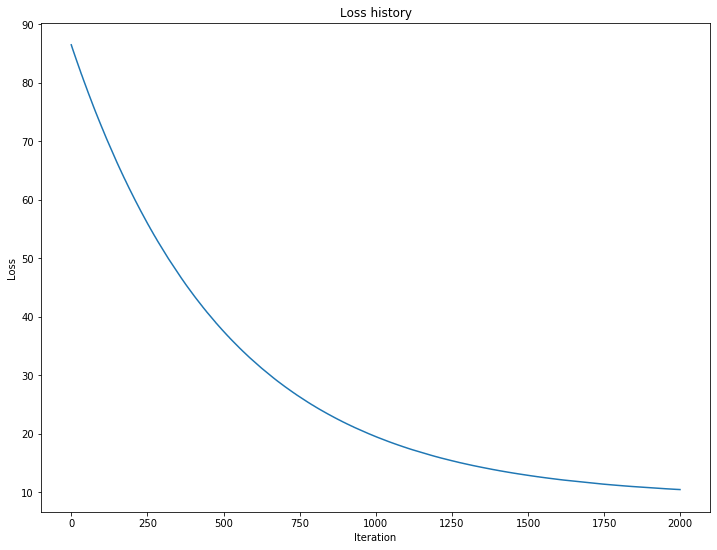

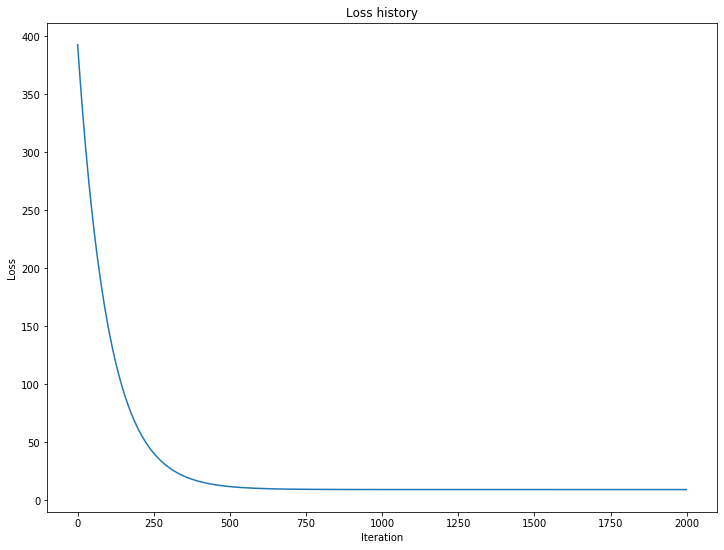

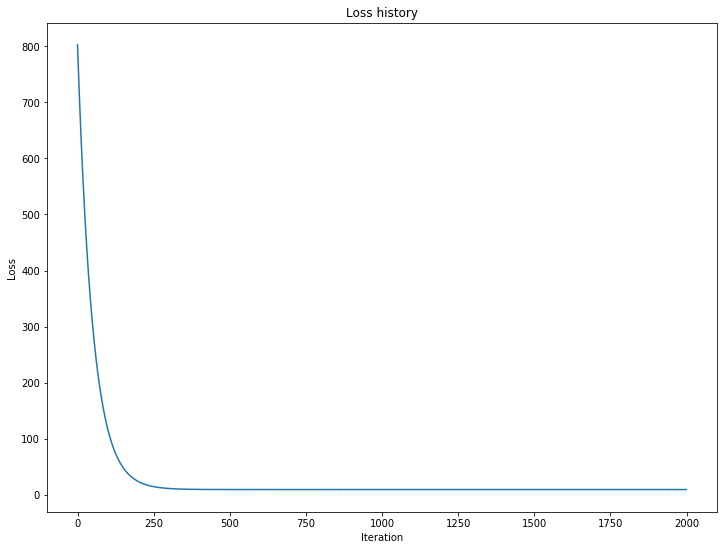

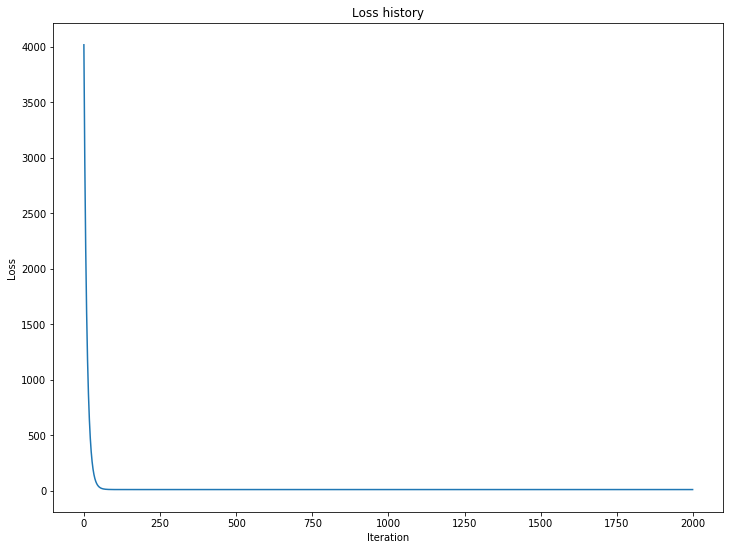

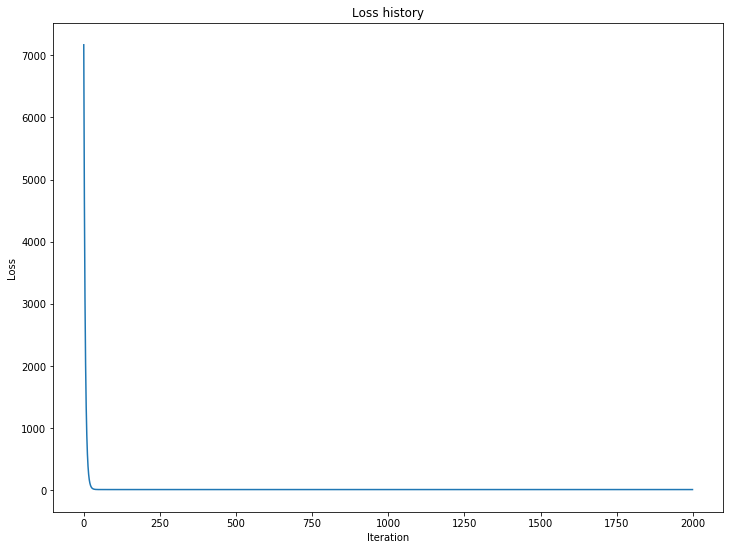

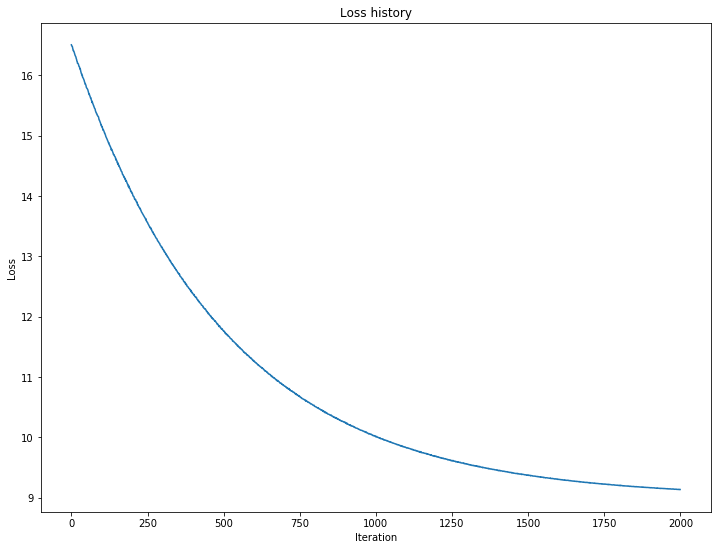

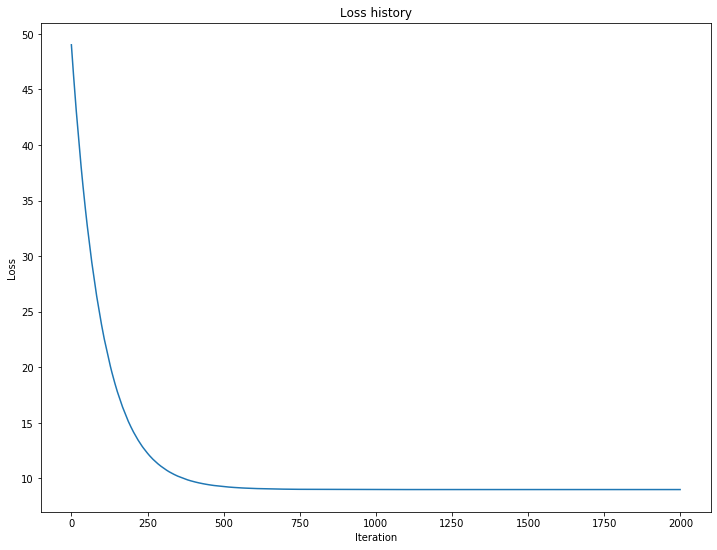

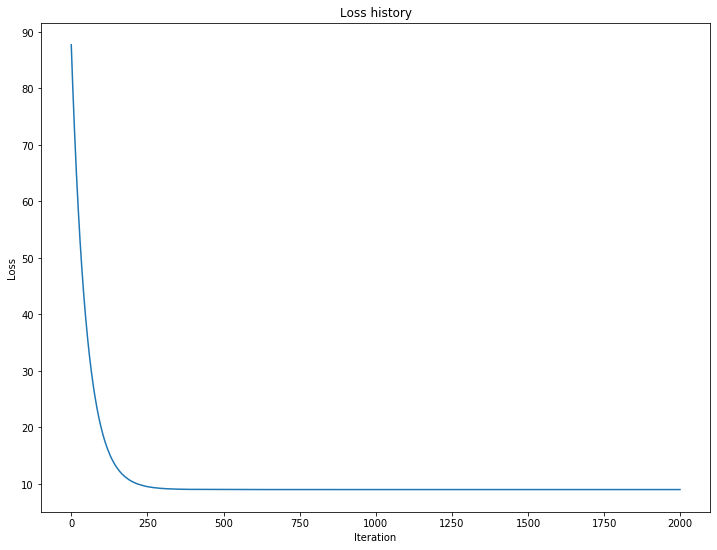

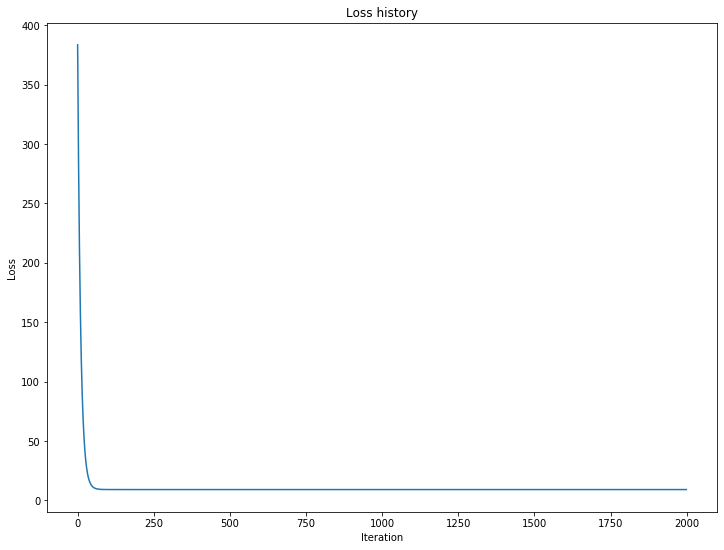

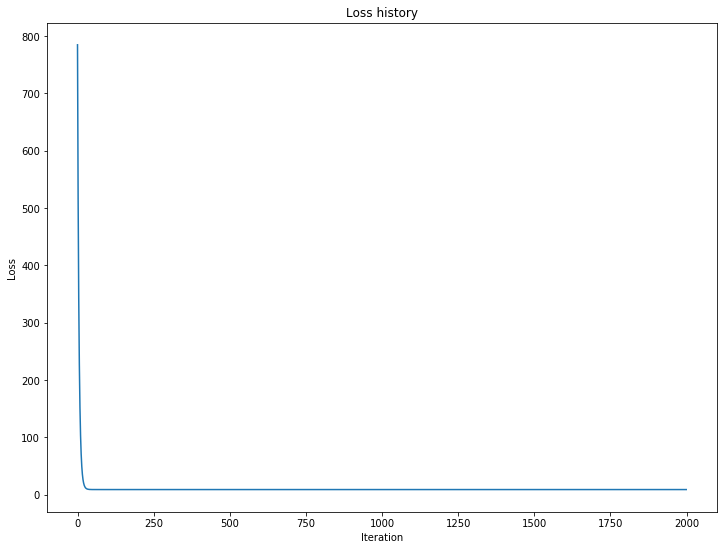

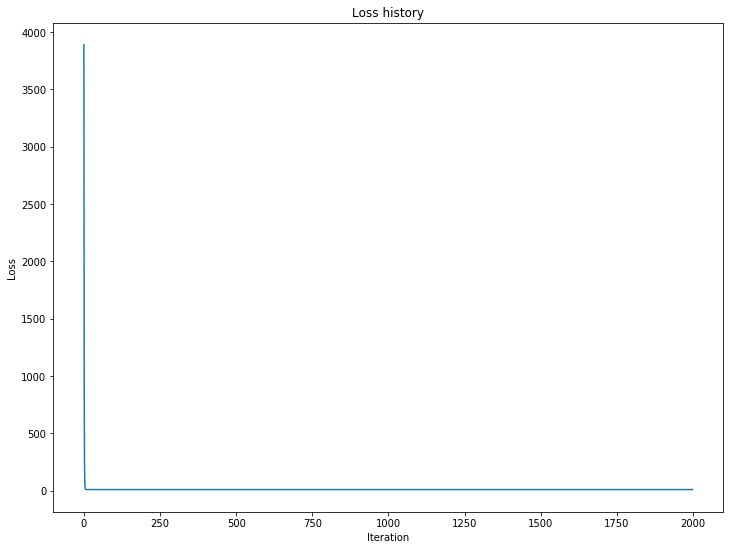

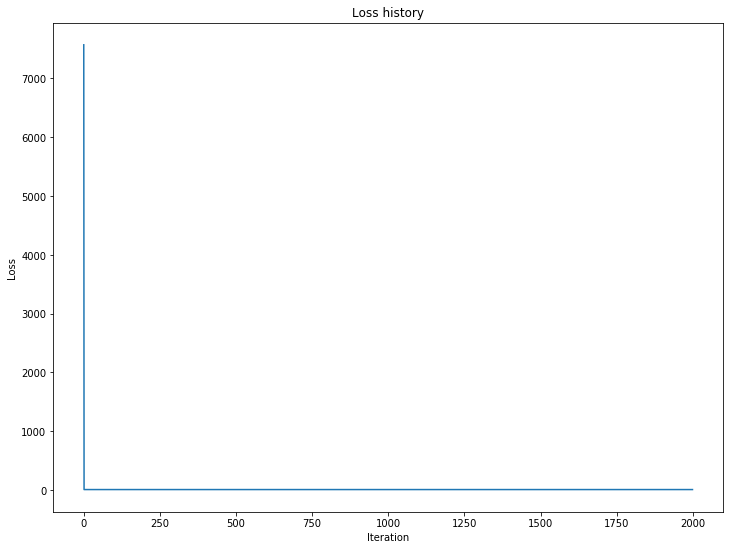

In [17]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e4, 5e4, 1e5, 5e5, 1e6, 5e6, 1e7]

results = {}
best_val = -1
best_svm = None
figure_num=1
pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for rate in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=rate, reg=reg, num_iters=2000, verbose=False)
        train_acc_history = []
        val_acc_history = []
        y_train_pred = svm.predict(X_train_feats)
        acc_tr = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        acc_val = np.mean(y_val == y_val_pred)
        
        print("="*30)
        print('rate: %e ,reg: %e ,figure :%d ' % (rate, reg, figure_num))
        plt.figure(figure_num)
        plt.plot(loss_hist)
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        figure_num += 1
        
        results[(rate, reg)] = (acc_tr, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for rate, reg in sorted(results):
    train_accuracy, val_accuracy = results[(rate, reg)]
    print ('rate %e reg %e train accuracy: %f val accuracy: %f' % (
                rate, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

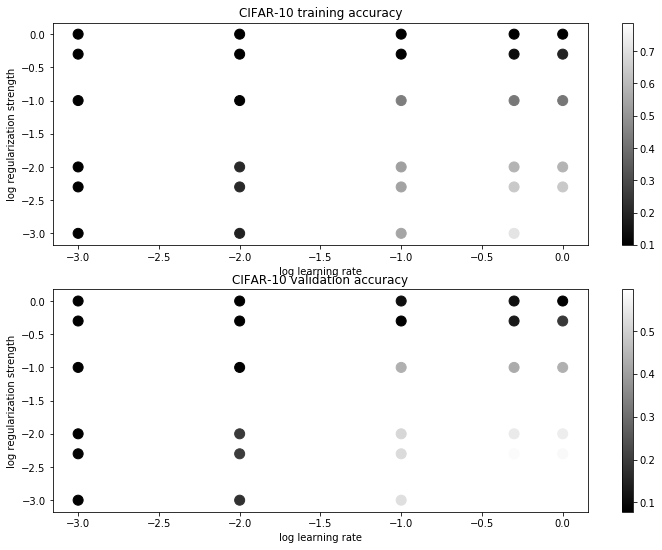

In [24]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [25]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print (test_accuracy)

0.424


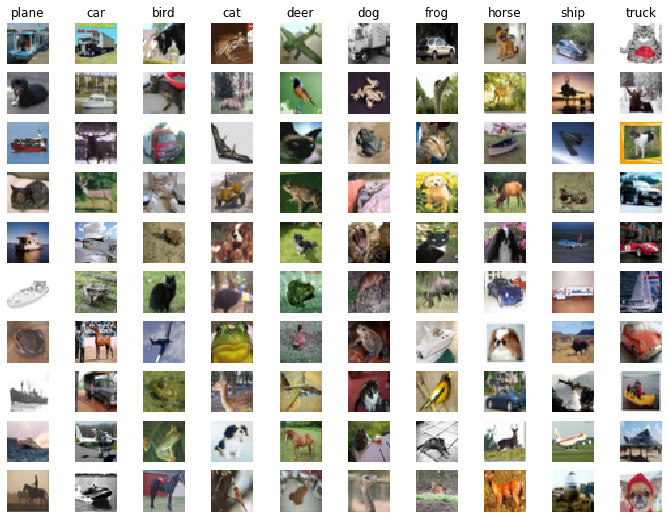

In [26]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
描述你看到的错误分类结果。它们有意义吗?

## 图像特征的神经网络
在此之前，我们看到在原始像素上训练一个两层神经网络比在原始像素上训练线性分类器获得更好的分类性能。在这个本子中，我们已经看到线性分类器在图像特征上胜过线性分类器在原始像素上。

为了完整性，我们也应该尝试训练一个神经网络的图像特征。这种方法应该优于所有以前的方法:您应该能够轻松地在测试集上获得超过55%的分类精度;我们的最佳模型达到了60%的分类准确率。

In [21]:
print (X_train_feats.shape)

(49000, 155)


rate: 1.000000e-03 ,reg: 1.000000e-03


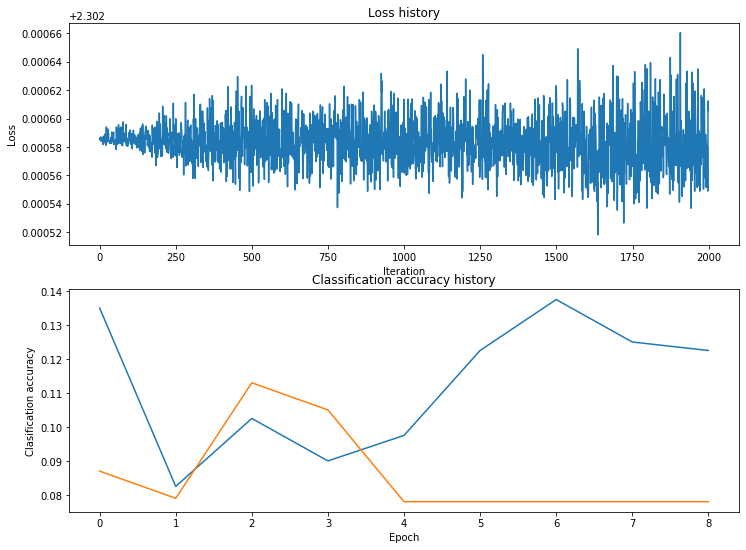

rate: 1.000000e-03 ,reg: 5.000000e-03


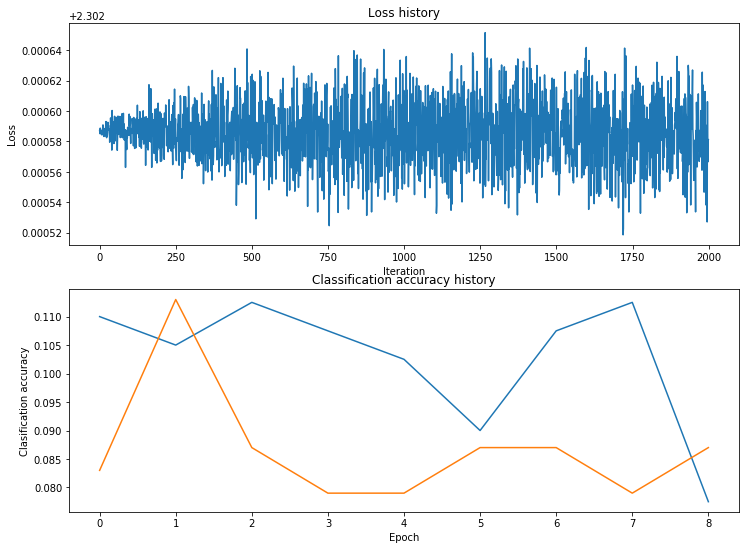

rate: 1.000000e-03 ,reg: 1.000000e-02


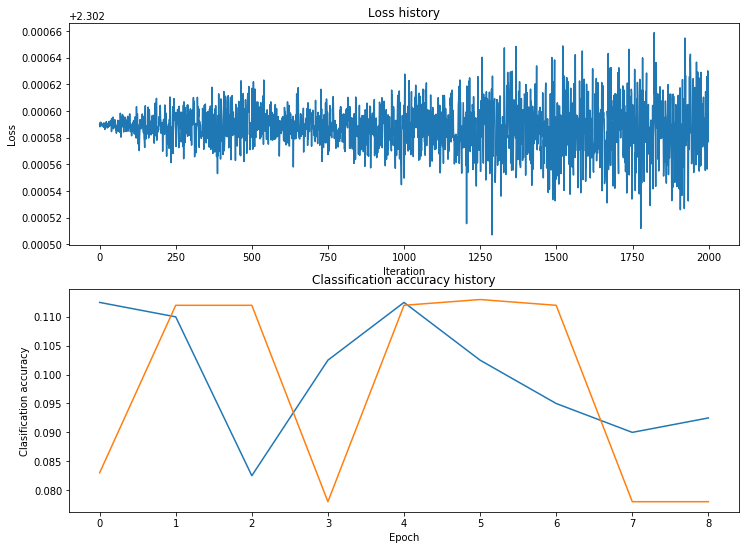

rate: 1.000000e-03 ,reg: 1.000000e-01


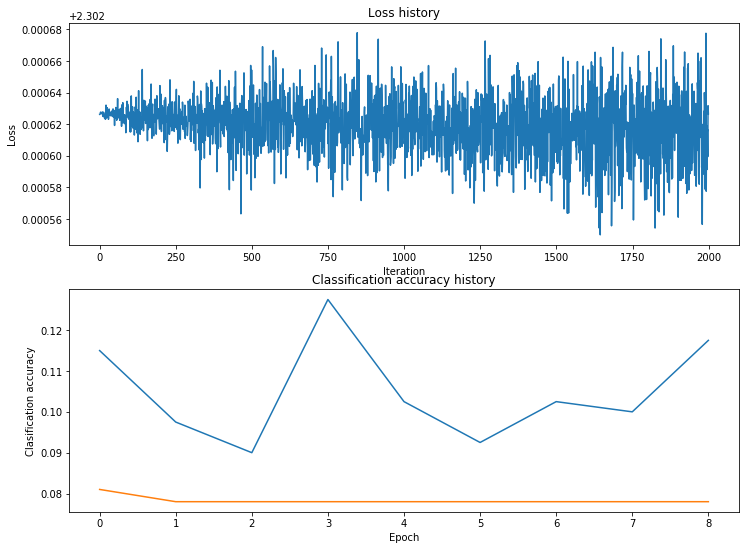

rate: 1.000000e-03 ,reg: 5.000000e-01


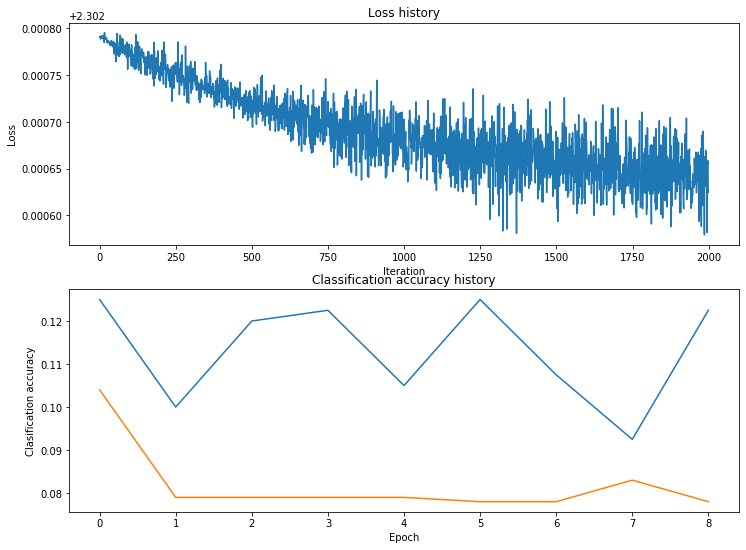

rate: 1.000000e-03 ,reg: 1.000000e+00


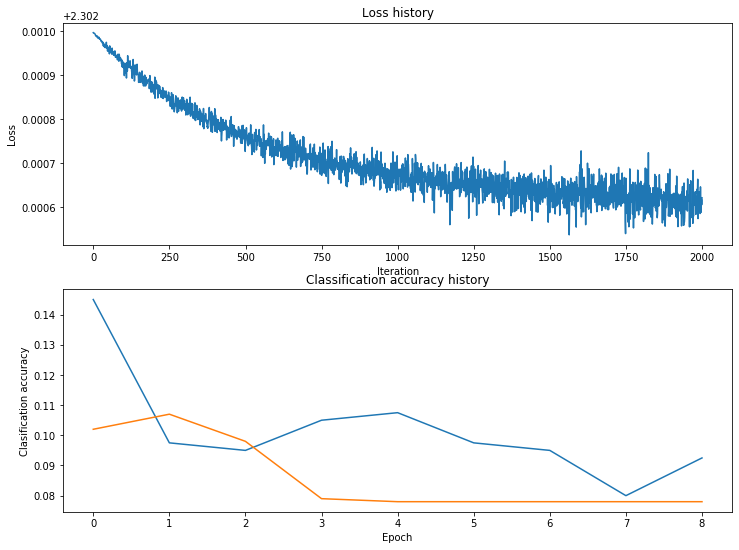

rate: 1.000000e-02 ,reg: 1.000000e-03


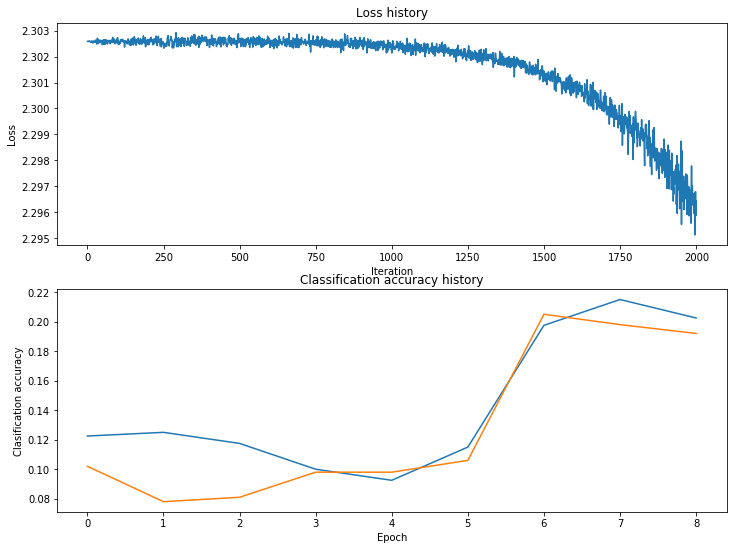

rate: 1.000000e-02 ,reg: 5.000000e-03


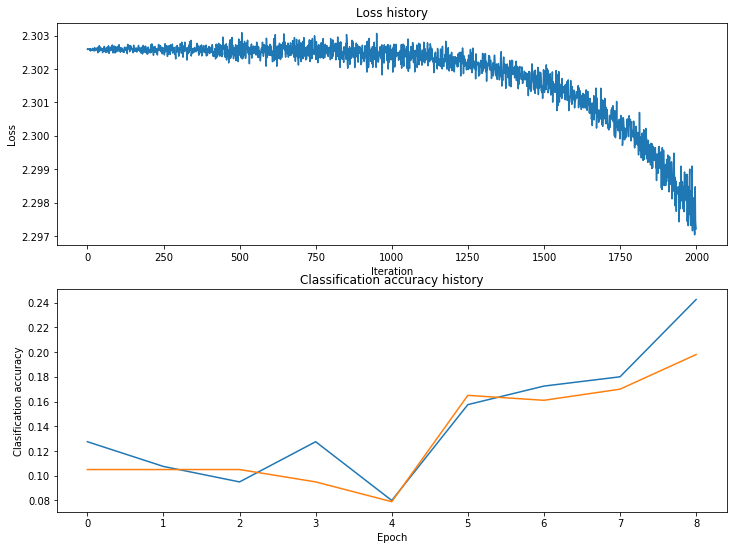

rate: 1.000000e-02 ,reg: 1.000000e-02


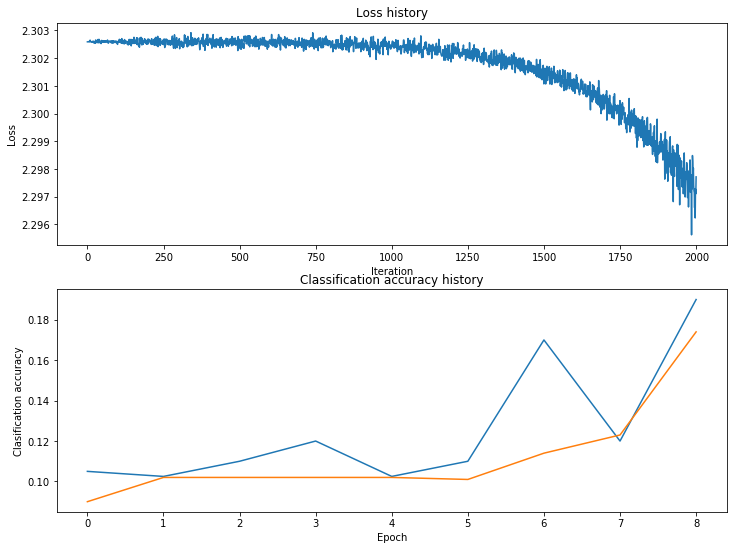

rate: 1.000000e-02 ,reg: 1.000000e-01


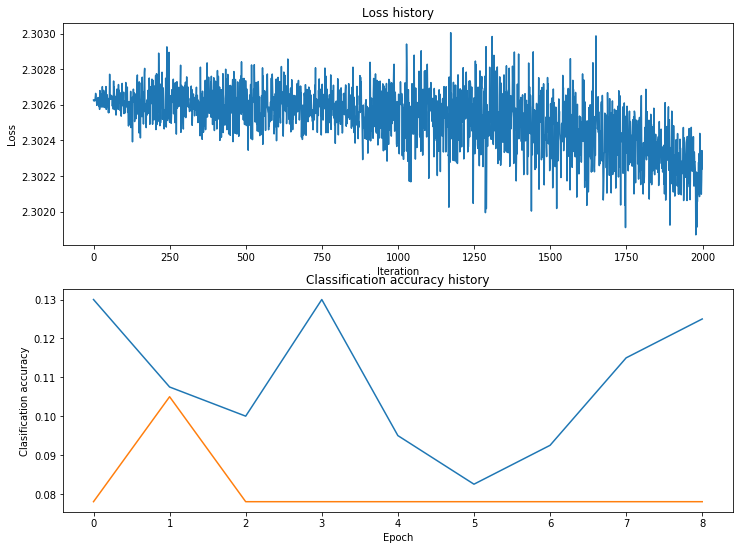

rate: 1.000000e-02 ,reg: 5.000000e-01


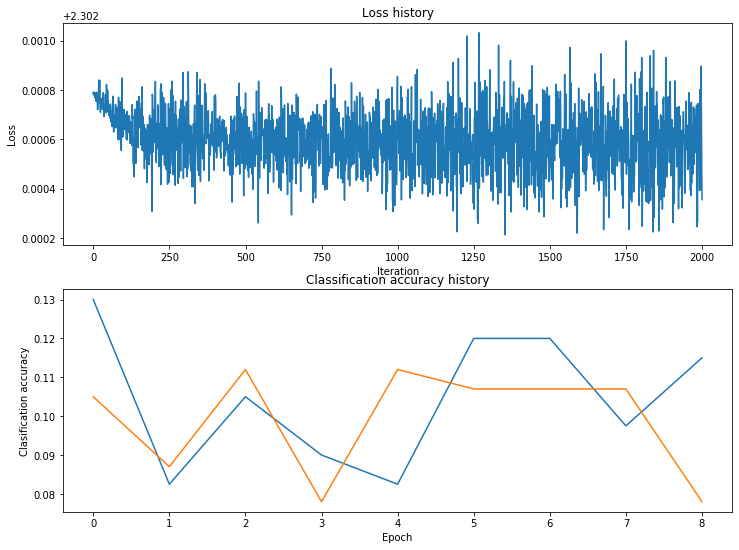

rate: 1.000000e-02 ,reg: 1.000000e+00


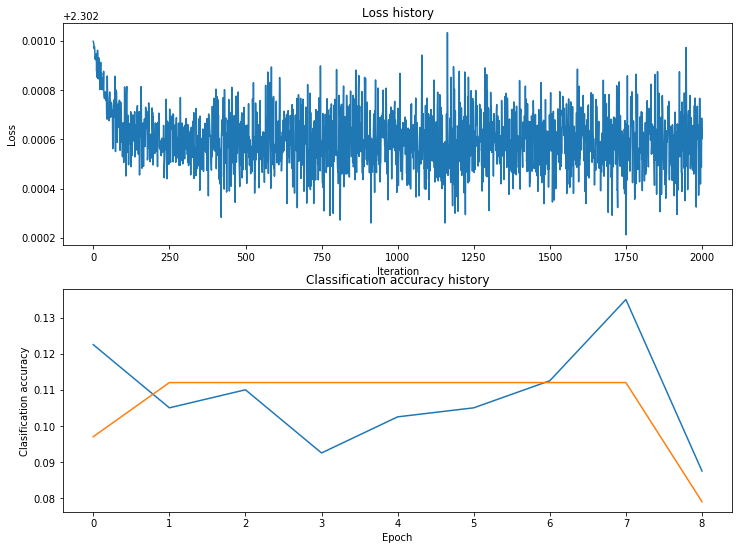

rate: 1.000000e-01 ,reg: 1.000000e-03


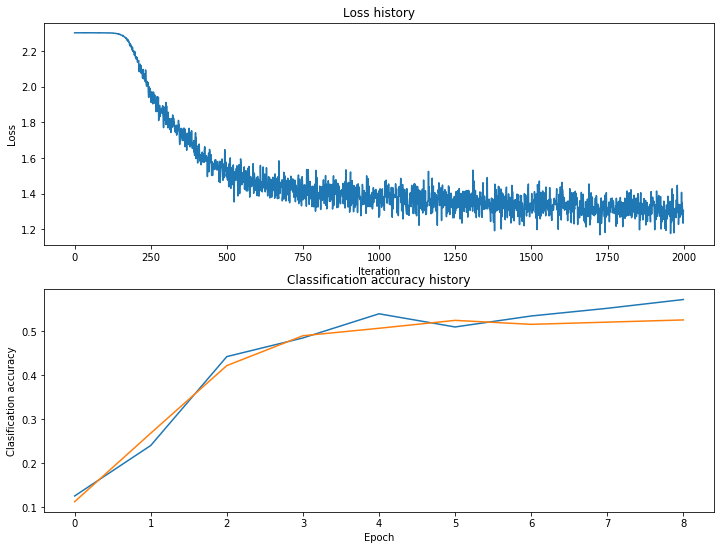

rate: 1.000000e-01 ,reg: 5.000000e-03


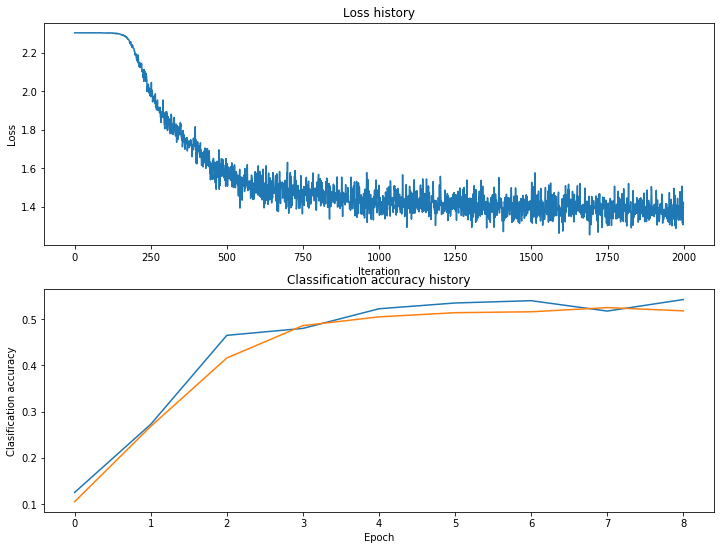

rate: 1.000000e-01 ,reg: 1.000000e-02


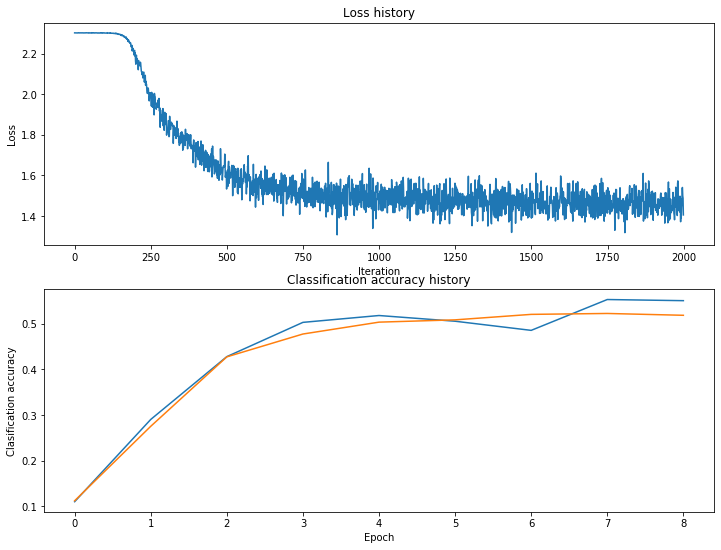

rate: 1.000000e-01 ,reg: 1.000000e-01


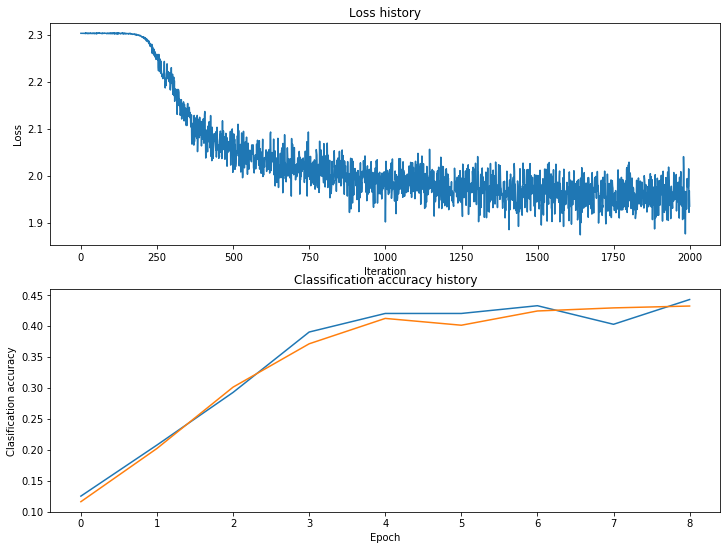

rate: 1.000000e-01 ,reg: 5.000000e-01


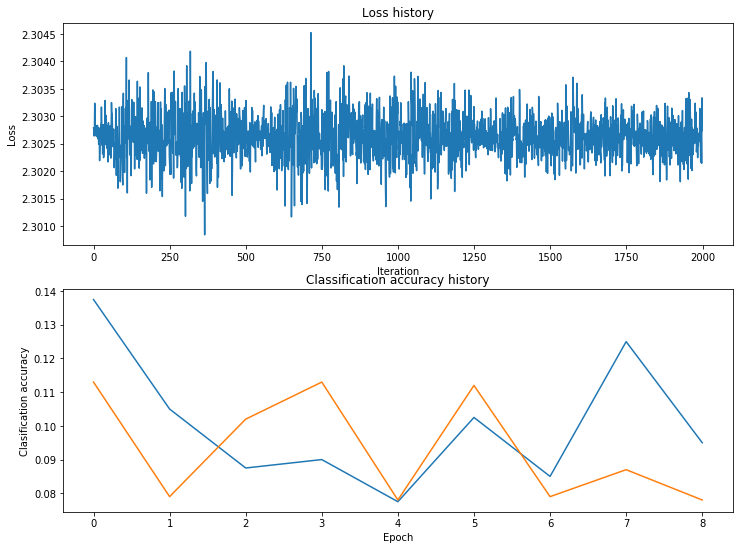

rate: 1.000000e-01 ,reg: 1.000000e+00


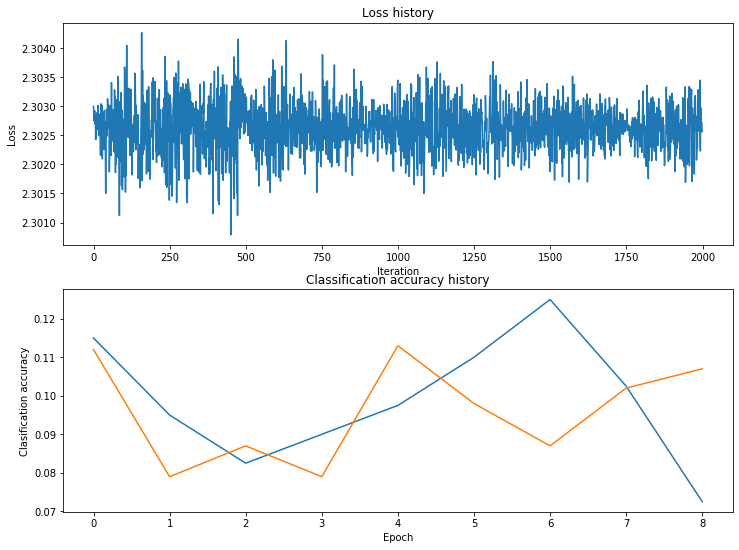

rate: 5.000000e-01 ,reg: 1.000000e-03


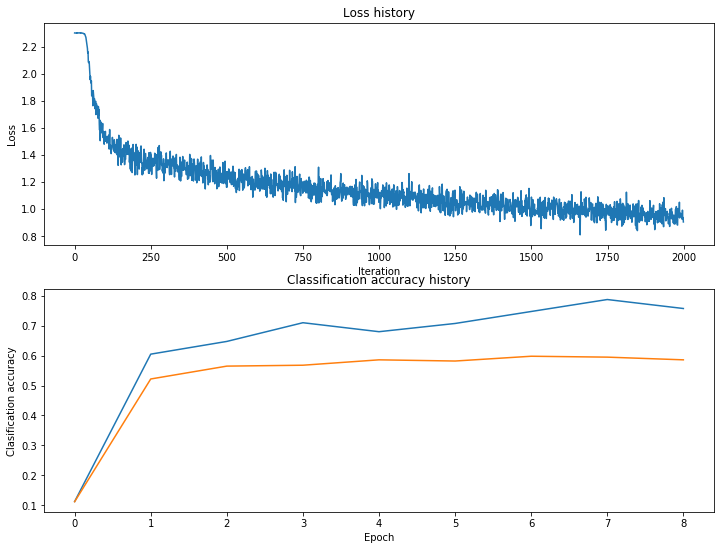

rate: 5.000000e-01 ,reg: 5.000000e-03


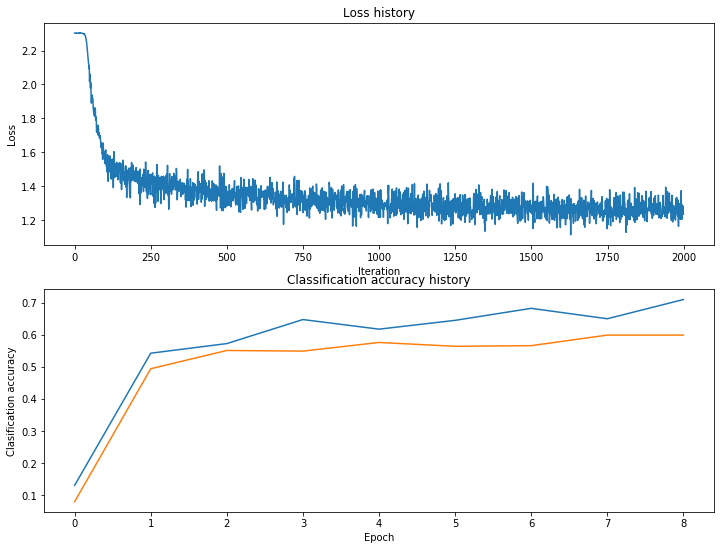

rate: 5.000000e-01 ,reg: 1.000000e-02


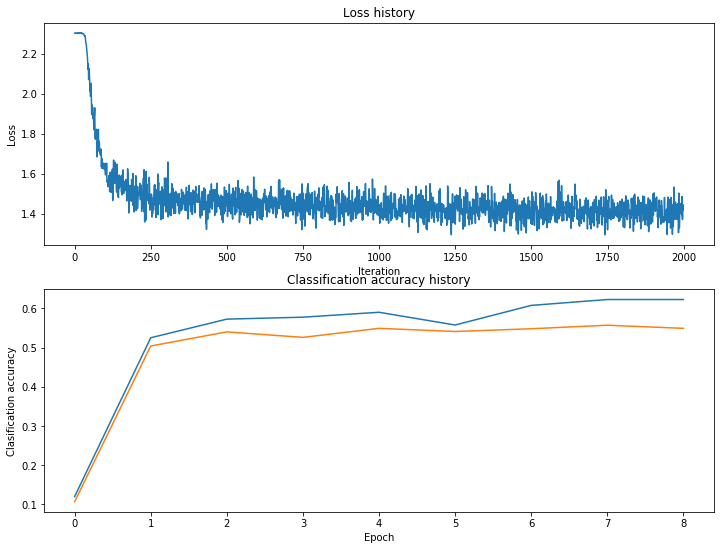

rate: 5.000000e-01 ,reg: 1.000000e-01


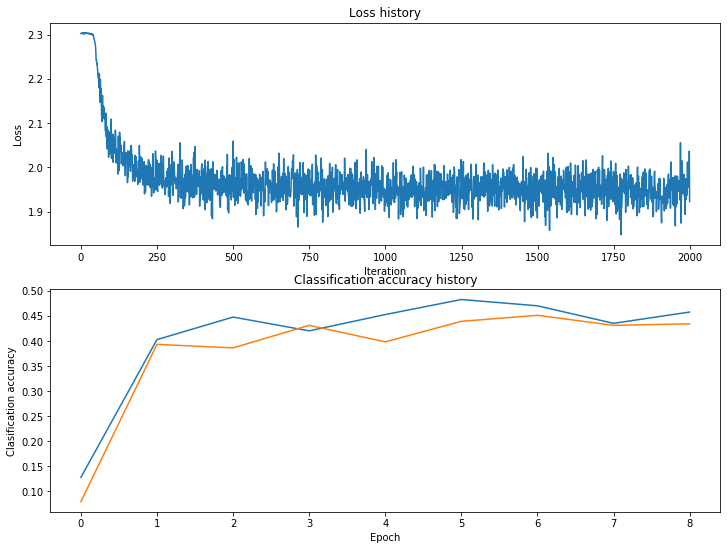

rate: 5.000000e-01 ,reg: 5.000000e-01


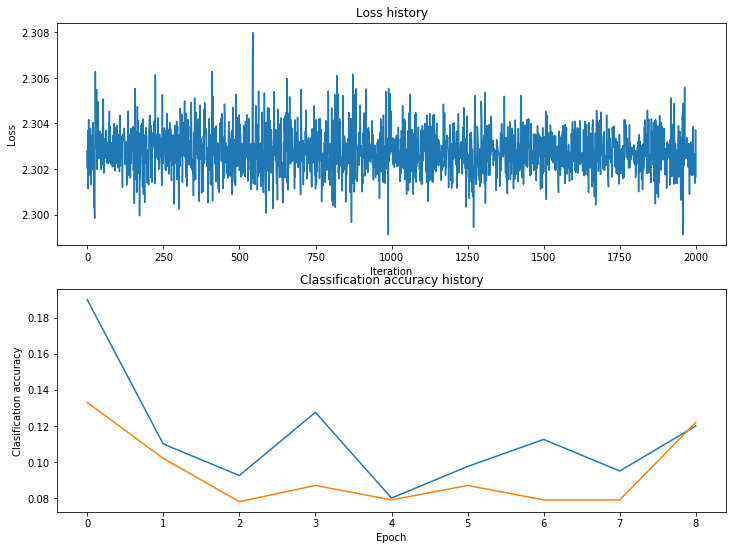

rate: 5.000000e-01 ,reg: 1.000000e+00


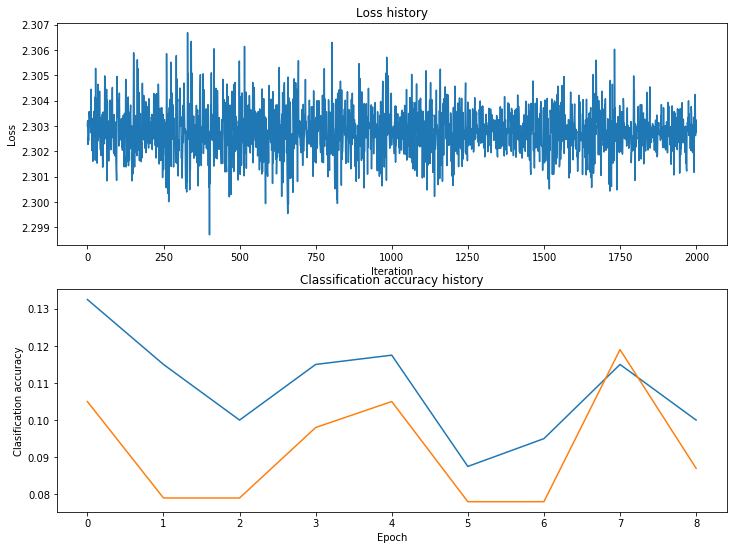

rate: 1.000000e+00 ,reg: 1.000000e-03


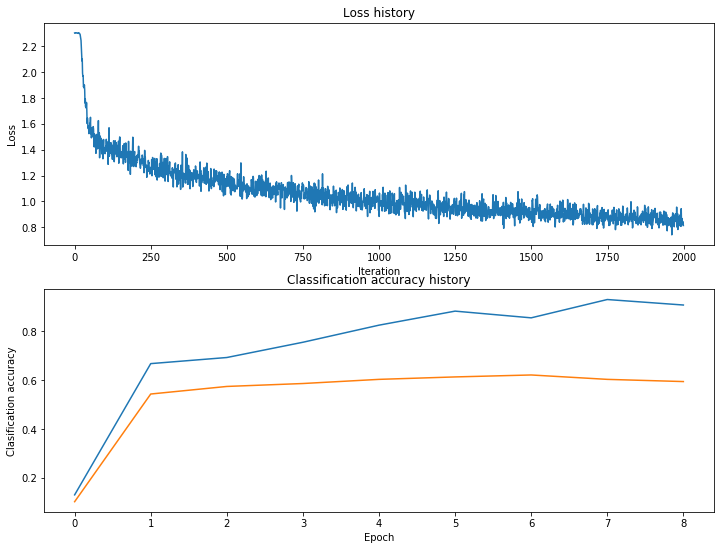

rate: 1.000000e+00 ,reg: 5.000000e-03


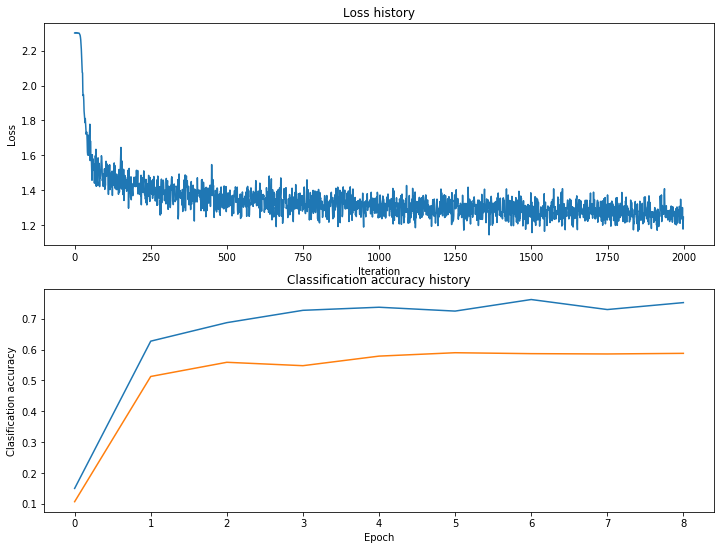

rate: 1.000000e+00 ,reg: 1.000000e-02


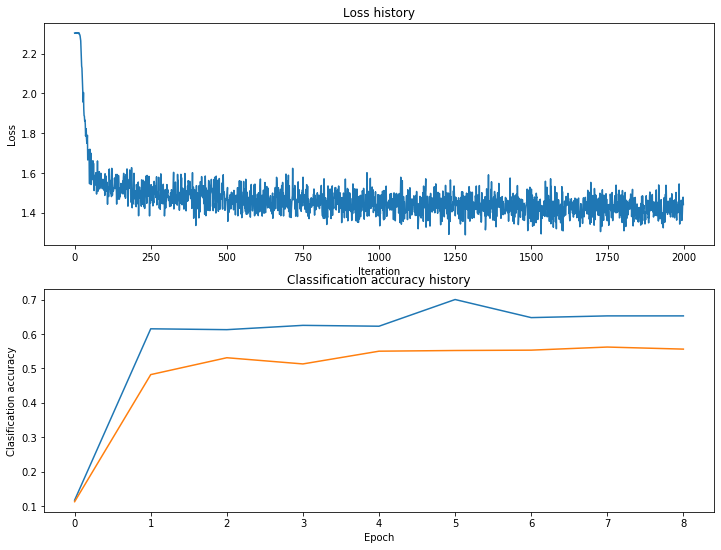

rate: 1.000000e+00 ,reg: 1.000000e-01


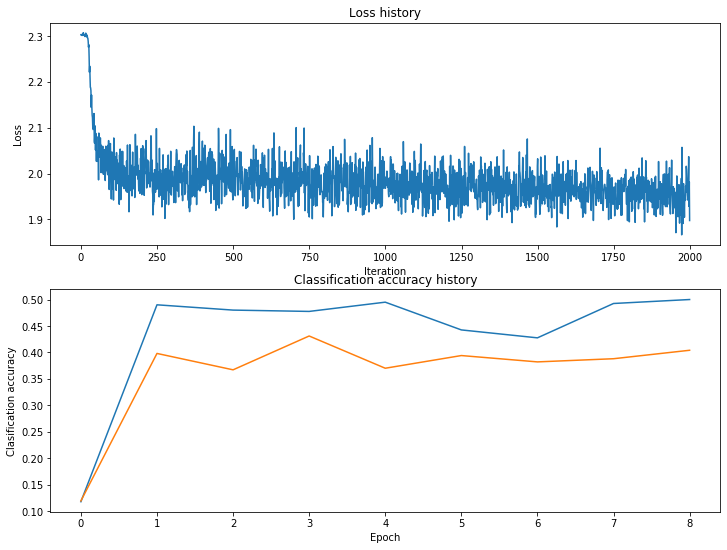

rate: 1.000000e+00 ,reg: 5.000000e-01


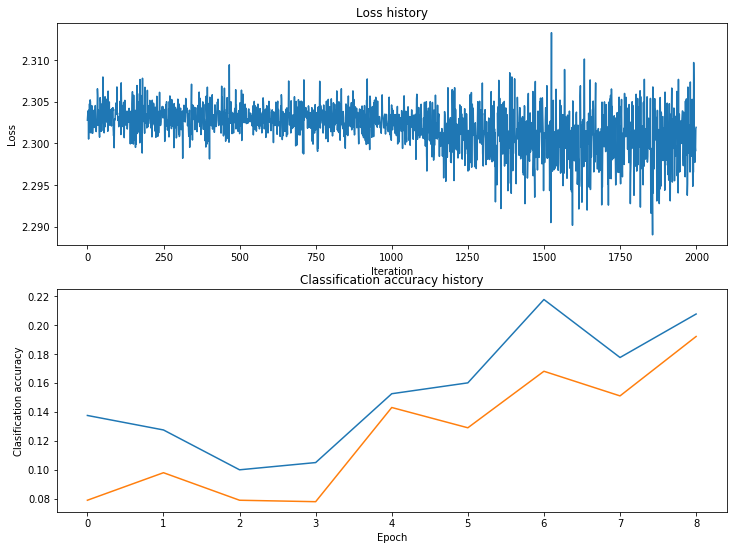

rate: 1.000000e+00 ,reg: 1.000000e+00


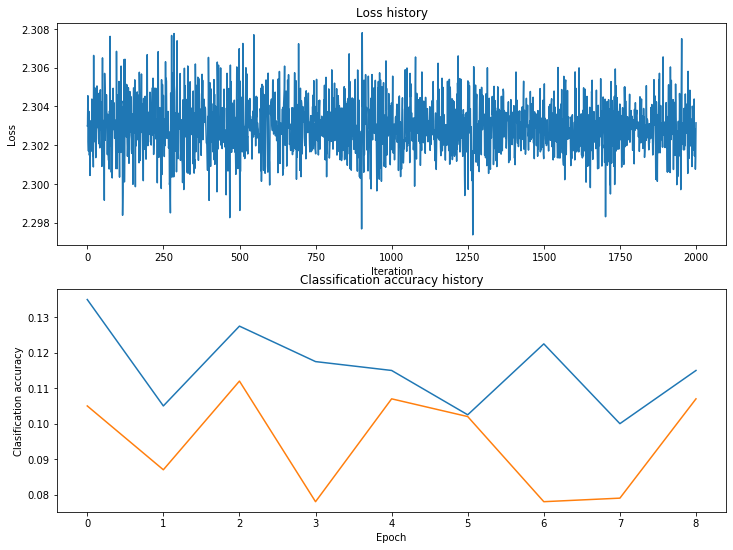

lr 1.000000e-03 reg 1.000000e-03 train accuracy: 0.100429 val accuracy: 0.079000
lr 1.000000e-03 reg 5.000000e-03 train accuracy: 0.100265 val accuracy: 0.087000
lr 1.000000e-03 reg 1.000000e-02 train accuracy: 0.100918 val accuracy: 0.079000
lr 1.000000e-03 reg 1.000000e-01 train accuracy: 0.100449 val accuracy: 0.078000
lr 1.000000e-03 reg 5.000000e-01 train accuracy: 0.100449 val accuracy: 0.078000
lr 1.000000e-03 reg 1.000000e+00 train accuracy: 0.100449 val accuracy: 0.078000
lr 1.000000e-02 reg 1.000000e-03 train accuracy: 0.190776 val accuracy: 0.178000
lr 1.000000e-02 reg 5.000000e-03 train accuracy: 0.211224 val accuracy: 0.201000
lr 1.000000e-02 reg 1.000000e-02 train accuracy: 0.211163 val accuracy: 0.196000
lr 1.000000e-02 reg 1.000000e-01 train accuracy: 0.100510 val accuracy: 0.078000
lr 1.000000e-02 reg 5.000000e-01 train accuracy: 0.100449 val accuracy: 0.078000
lr 1.000000e-02 reg 1.000000e+00 train accuracy: 0.100429 val accuracy: 0.079000
lr 1.000000e-01 reg 1.000000

In [22]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = -1
results = {}
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rates = [1e-3, 1e-2, 1e-1, 5e-1, 1]
regularization_strengths = [1e-3, 5e-3, 1e-2, 1e-1, 0.5, 1]
for rate in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=2000, batch_size=400,
            learning_rate=rate, learning_rate_decay=0.90,
            reg=reg, verbose=False)        
        y_train_pred = net.predict(X_train_feats)
        acc_tr = np.mean(y_train == y_train_pred)
        y_val_pred = net.predict(X_val_feats)
        acc_val = np.mean(y_val == y_val_pred)
        # Plot the loss function and train / validation accuracies
        print("="*30)
        print('rate: %e ,reg: %e' % (rate, reg))
        plt.subplot(2, 1, 1)
        plt.plot(stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        plt.plot(stats['train_acc_history'], label='train')
        plt.plot(stats['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.show()
        
        
        results[(rate, reg)] = (acc_tr, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_net = net
            
for rate, reg in sorted(results):
    train_accuracy, val_accuracy = results[(rate, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                rate, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

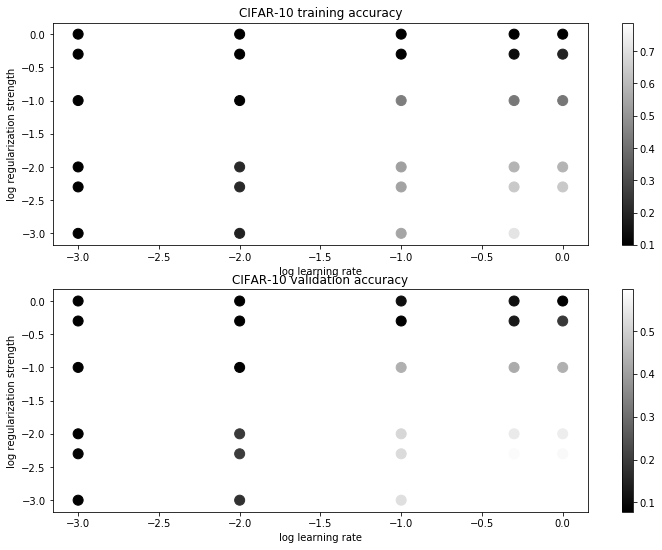

In [27]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [30]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print (test_acc)

0.576


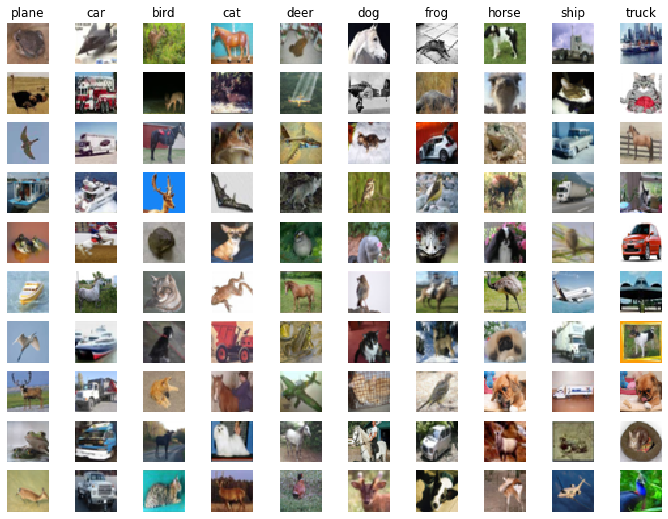

In [31]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

# 设计你自己的特色!
您已经看到，简单的图像特征可以提高分类性能。到目前为止，我们已经尝试了HOG和颜色直方图，但是其他类型的特征可能能够实现更好的分类性能。

在CIFAR-10中，设计并实现一种新的特征并将其用于图像分类。解释你的特征是如何工作的，为什么你期望它对图像分类有用。在这个笔记本中实现它，交叉验证任何超参数，并将其性能与HOG +颜色直方图基线进行比较。

# 做一些额外的事情!
使用我们在这次作业中提供的材料和代码来做一些有趣的事情。我们还应该问别的问题吗?你在做作业的时候有没有想到什么好主意?这是你炫耀的机会!